In [12]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

import matplotlib.pyplot as plt
import seaborn as sns
import polars as pl
import numpy as np
import os

DATA_PATH = "./data/pet_store_records_2020.csv"

# Read data

In [13]:
datasheet = pl.read_csv(DATA_PATH, has_header=True, separator=",")
datasheet

product_id,product_category,sales,price,VAP,vendor_id,country,pet_size,pet_type,rating,re_buy
i64,str,i64,i64,i64,str,str,str,str,i64,i64
5040,"""Equipment""",123,7293,0,"""VC_1605""","""Vietnam""","""small""","""fish""",7,1
4567,"""Toys""",61,9304,1,"""VC_1132""","""India""","""small""","""cat""",10,0
4237,"""Toys""",218,8180,0,"""VC_802""","""India""","""small""","""hamster""",6,0
4364,"""Snack""",69,18559,1,"""VC_929""","""India""","""large""","""dog""",1,1
4184,"""Supplements""",138,10283,1,"""VC_749""","""India""","""large""","""dog""",10,0
4609,"""Bedding""",183,3969,1,"""VC_1174""","""India""","""large""","""cat""",10,0
4380,"""Toys""",79,13519,1,"""VC_945""","""India""","""extra_small""","""dog""",8,0
4389,"""Bedding""",205,13078,0,"""VC_954""","""India""","""large""","""cat""",9,0
4697,"""Supplements""",116,13701,0,"""VC_1262""","""Belgium""","""small""","""cat""",10,0


In [14]:
datasheet = datasheet.drop(['vendor_id', 'VAP'])
datasheet.head()

product_id,product_category,sales,price,country,pet_size,pet_type,rating,re_buy
i64,str,i64,i64,str,str,str,i64,i64
5040,"""Equipment""",123,7293,"""Vietnam""","""small""","""fish""",7,1
4567,"""Toys""",61,9304,"""India""","""small""","""cat""",10,0
4237,"""Toys""",218,8180,"""India""","""small""","""hamster""",6,0
4364,"""Snack""",69,18559,"""India""","""large""","""dog""",1,1
4184,"""Supplements""",138,10283,"""India""","""large""","""dog""",10,0


### Check execution datas.

In [15]:
datasheet.null_count()

product_id,product_category,sales,price,country,pet_size,pet_type,rating,re_buy
u32,u32,u32,u32,u32,u32,u32,u32,u32
0,0,0,0,0,0,0,0,0


In [16]:
datasheet.describe()

describe,product_id,product_category,sales,price,country,pet_size,pet_type,rating,re_buy
str,f64,str,f64,f64,str,str,str,f64,f64
"""count""",879.0,"""879""",879.0,879.0,"""879""","""879""","""879""",879.0,879.0
"""null_count""",0.0,"""0""",0.0,0.0,"""0""","""0""","""0""",0.0,0.0
"""mean""",4611.0,null,116.094425,9862.49033,null,null,null,6.500569,0.466439
"""std""",253.88974,null,66.297297,5532.573959,null,null,null,2.852835,0.499156
"""min""",4172.0,"""Accessory""",3.0,27.0,"""Belgium""","""extra_large""","""bird""",1.0,0.0
"""max""",5050.0,"""Toys""",230.0,19438.0,"""Vietnam""","""small""","""rabbit""",10.0,1.0
"""median""",4611.0,null,116.0,9963.0,null,null,null,6.0,0.0
"""25%""",4391.0,null,60.0,4999.0,null,null,null,5.0,0.0
"""75%""",4831.0,null,177.0,14479.0,null,null,null,10.0,1.0


In [17]:
relationship = datasheet[['sales', 'price', 'rating', 're_buy']].corr()

### Plotting for analysis

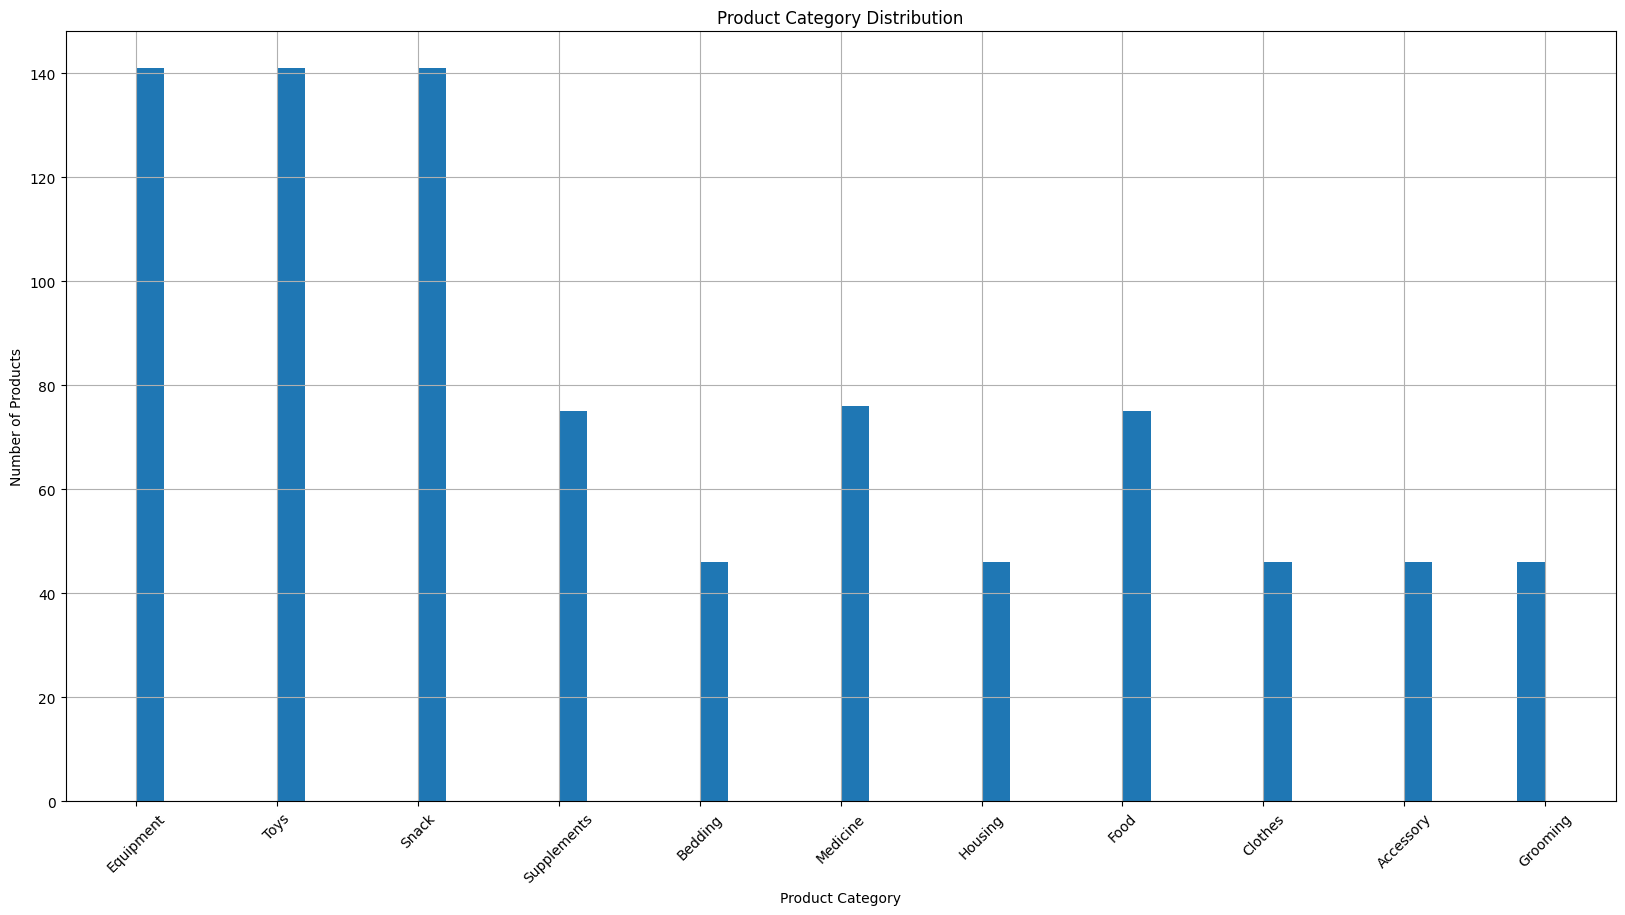

In [18]:
plt.figure(figsize=(20, 10))
plt.hist(datasheet['product_category'], bins=50)
plt.grid()
plt.xlabel('Product Category')
plt.ylabel('Number of Products')
plt.title('Product Category Distribution')
plt.xticks(rotation=45)
plt.show()

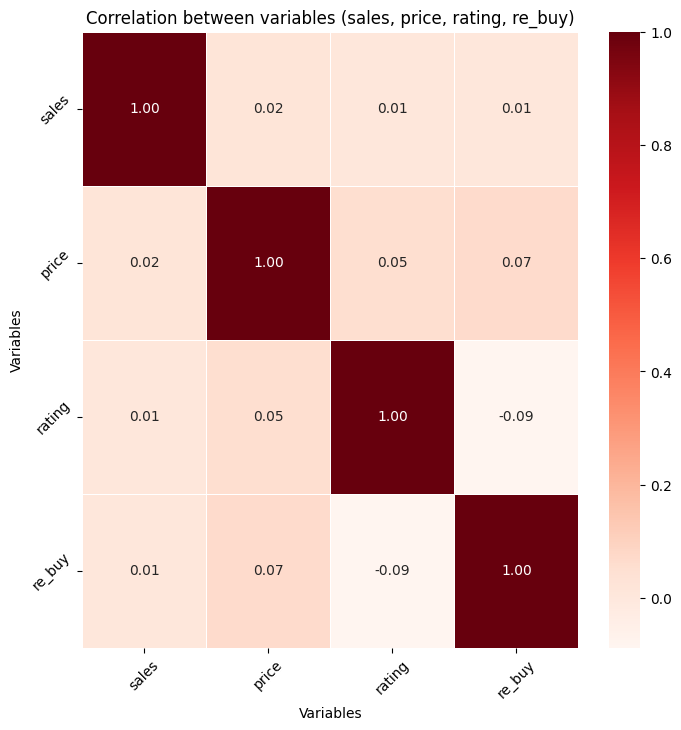

In [19]:
plt.figure(figsize=(8, 8))
sns.heatmap(relationship, annot=True, fmt=".2f", linewidths=.5, cmap='Reds')
plt.title("Correlation between variables (sales, price, rating, re_buy)")
plt.xlabel("Variables")
plt.ylabel("Variables")
plt.xticks([0.5, 1.5, 2.5, 3.5], ["sales", "price", "rating", "re_buy"], rotation=45)
plt.yticks([0.5, 1.5, 2.5, 3.5], ["sales", "price", "rating", "re_buy"], rotation=45)
plt.show()

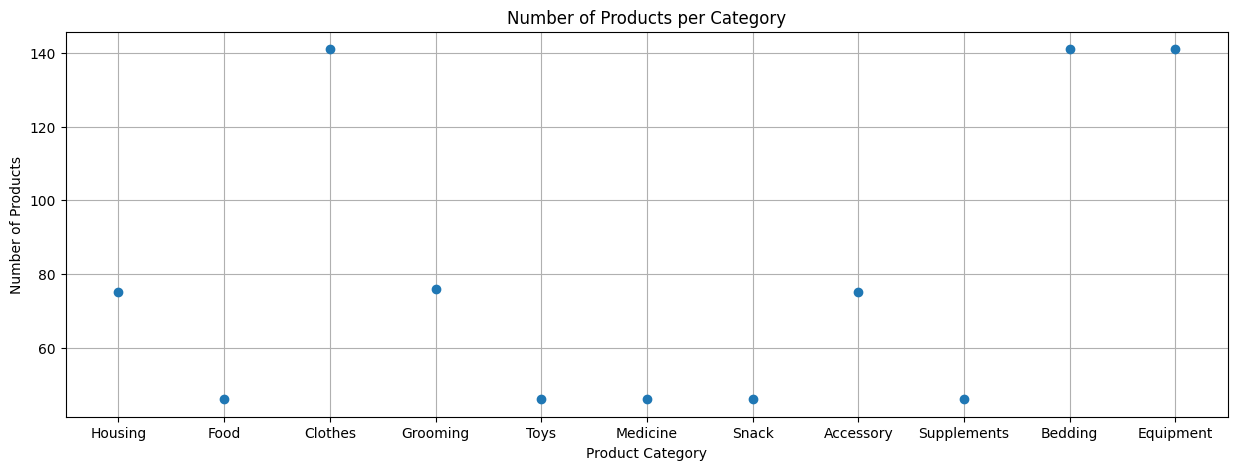

In [48]:
plt.figure(figsize=(15, 5))
plt.plot(datasheet['product_category'].value_counts()[:, 0], datasheet['product_category'].value_counts()[:, 1], linestyle='none', marker='o')
plt.xlabel('Product Category')
plt.ylabel('Number of Products')
plt.title('Number of Products per Category')
plt.grid(True)
plt.show()

# Pre-processing

In [31]:
onehot_encoder = OneHotEncoder()

prod_cate = datasheet['product_category', :].to_numpy().reshape(-1, 1)
datasheet['product_category', :] = onehot_encoder.fit_transform(prod_cate).reshape(-1, 1)

ValueError: column selection not understood: slice(None, None, None)

# Train, Test(Validation) Split

In [9]:
y_data = datasheet['rating'].to_numpy()
X_data = datasheet.drop(['rating']).to_numpy()

print(f"""X_data shape: {X_data.shape}
y_data shape: {y_data.shape}""")

X_data shape: (879, 8)
y_data shape: (879,)


In [10]:
X_train, X_test, y_train, y_test = train_test_split(X_data, y_data, test_size=0.2, random_state=42)
print(f"""X_train: {X_train.shape}
y_train: {y_train.shape}
X_test: {X_test.shape}
y_test: {y_test.shape}""")

X_train: (703, 8)
y_train: (703,)
X_test: (176, 8)
y_test: (176,)


In [11]:
classifier = DecisionTreeClassifier()
classifier.fit(X_train, y_train)

ValueError: could not convert string to float: 'Housing'